In [1]:
#from src.tree import *
#from src.utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
sns.set()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
data_set_name = "creditcard"
#df, dd, ddi = tree("creditcard",
#                   max_depth_values=list(range(1, 10, 2)) + list(range(10, 41, 10)),
#                   min_samples_split_values=range(2, 20, 5),
#                   training_sizes=range(10000, 213605, 50000))
with open("stats/tree_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dd = pickle.load(handle)
with open("stats/tree_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddi = pickle.load(handle)

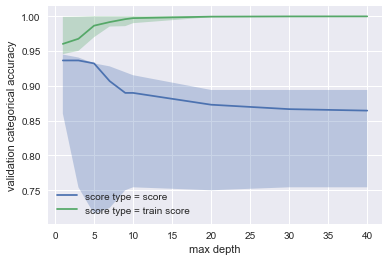

In [3]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=None)
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_creditcard_max_depth.png")
plt.show()

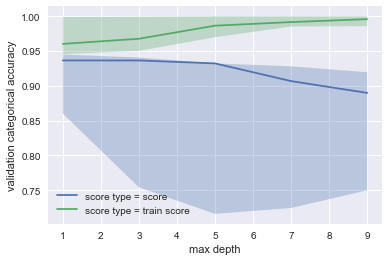

In [4]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['max_depth'], list(range(1,10,2)))])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_creditcard_max_depth.png")
plt.show()

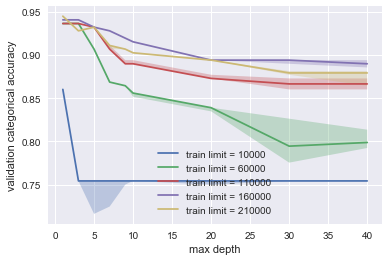

In [5]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], 'score')])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_creditcard_max_depth_train_limit.png")
plt.show()

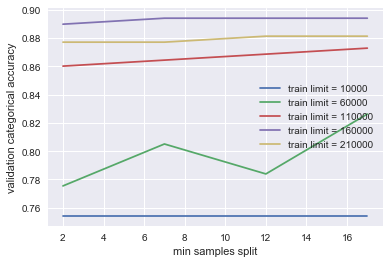

In [6]:
x_arg_name = 'min_samples_split'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], 'score'), (ddi['max_depth'], 30)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_creditcard_max_depth_train_limit.png")
plt.show()

# Starcraft dataset

In [7]:
data_set_name = "starcraft"
#df, dd, ddi = tree("creditcard",
#                   max_depth_values=list(range(1, 10, 2)) + list(range(10, 41, 10)),
#                   min_samples_split_values=range(2, 20, 5),
#                   training_sizes=range(10000, 213605, 50000))
with open("stats/tree_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dds = pickle.load(handle)
with open("stats/tree_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddis = pickle.load(handle)

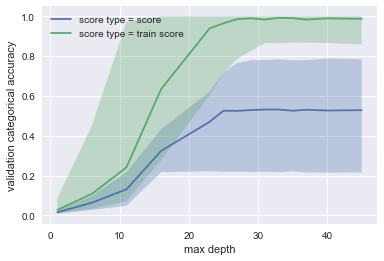

In [8]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=None)
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_"+data_set_name+"_"+x_arg_name+".png")
plt.show()

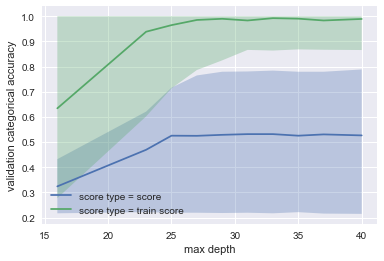

In [9]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddis['max_depth'], list(range(15,41,1)))])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_"+data_set_name+"_"+x_arg_name+".png")
plt.show()

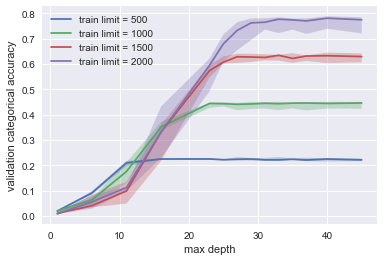

In [10]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddis['score_type'], 'score')])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_"+data_set_name+"_"+x_arg_name+".png")
plt.show()

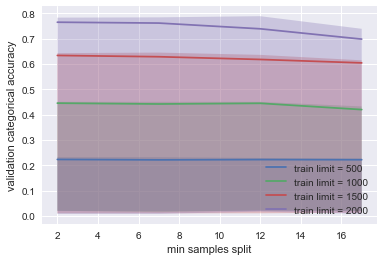

In [11]:
x_arg_name = 'min_samples_split'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddis['score_type'], 'score'),])# (ddis['max_depth'], 30)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/tree_"+data_set_name+"_"+x_arg_name+".png")
plt.show()